In [83]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
with open('../raw_data/atl_weather.json') as f:
  data = json.load(f)

In [38]:
clean_dict_list = []
for x in range(len(data)):
    date = data[x]['dt']
    date_iso = data[x]["dt_iso"]
    weather_id = data[x]["weather"][0]["id"]
    weather_group = data[x]["weather"][0]["main"]
    weather = data[x]["weather"][0]["description"]
    weather_icon = data[x]["weather"][0]["icon"]
    temperature = data[x]["main"]["temp"]
    temp_min = data[x]["main"]["temp_min"]
    temp_max = data[x]["main"]["temp_max"]
    feels_like = data[x]["main"]["feels_like"]
    pressure = data[x]["main"]["pressure"]
    humidity = data[x]["main"]["humidity"]
    wind_speed = data[x]["wind"]["speed"]
    cloud_percentage = data[x]["clouds"]["all"]
    
    weather_dict = {
        "date": date,
        "date_iso": date_iso,
        "weather_id": weather_id,
        "weather_group": weather_group,
        "weather": weather,
        "weather_icon": weather_icon,
        "temperature": temperature,
        "temp_min": temp_min,
        "temp_max": temp_max,
        "feels_like": feels_like,
        "pressure": pressure,
        "humidity": humidity,
        "wind_speed": wind_speed,
        "cloud_percentage": cloud_percentage
    }
    
    clean_dict_list.append(weather_dict)
    

In [39]:
atl_weather_df = pd.DataFrame(clean_dict_list)

In [40]:
# date is in UNIX format, convert to datetime
atl_weather_df['date_simple'] = pd.to_datetime(atl_weather_df['date'],unit = 's') 

#datetime is in hours/seconds, use dt.date to remove hours
atl_weather_df['date_simple'] = atl_weather_df['date_simple'].dt.date

# converting report date to match format of weather data
atl_weather_df['date_simple'] = pd.to_datetime(atl_weather_df['date_simple'])

In [41]:
atl_weather_df.to_csv("../raw_data/all_weather.csv", index=True, header=True)

# Analysis

In [22]:
atl_weather_df.head()

,date,date_iso,weather_id,weather_group,weather,weather_icon,temperature,temp_min,temp_max,feels_like,pressure,humidity,wind_speed,cloud_percentage,date_simple
0,1230768000,2009-01-01 00:00:00 +0000 UTC,800,Clear,sky is clear,01n,39.78,39.20,41.12,25.48,1023,40,16.11,1,2009-01-01
1,1230771600,2009-01-01 01:00:00 +0000 UTC,800,Clear,sky is clear,01n,39.02,37.40,41.49,30.45,1024,40,5.82,1,2009-01-01
2,1230775200,2009-01-01 02:00:00 +0000 UTC,800,Clear,sky is clear,01n,37.81,37.04,40.35,28.63,1025,42,6.93,1,2009-01-01
3,1230778800,2009-01-01 03:00:00 +0000 UTC,800,Clear,sky is clear,01n,35.82,35.55,35.96,27.25,1025,45,5.82,1,2009-01-01
4,1230782400,2009-01-01 04:00:00 +0000 UTC,800,Clear,sky is clear,01n,34.59,33.80,35.52,27.39,1025,47,3.36,1,2009-01-01


In [23]:
atl_weather_df['weather_group'].unique()

array(['Clear', 'Clouds', 'Rain', 'Mist', 'Fog', 'Thunderstorm', 'Haze',
       'Snow', 'Drizzle', 'Squall', 'Smoke'], dtype=object)

In [24]:
atl_weather_df['weather'].unique()

array(['sky is clear', 'few clouds', 'scattered clouds',
       'overcast clouds', 'moderate rain', 'light rain', 'mist', 'fog',
       'thunderstorm', 'heavy intensity rain', 'broken clouds',
       'thunderstorm with rain', 'haze', 'light snow',
       'light intensity drizzle', 'snow', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity squalls',
       'very heavy rain', 'drizzle', 'freezing rain', 'heavy snow',
       'proximity thunderstorm', 'smoke', 'shower rain'], dtype=object)

In [25]:
atl_weather_df['cloud_percentage'].unique()

array([  1,  20,  40,  90,  75,   0,  23, 100,  24,  29,   3,  95,  99,
        47,  72,  46,  39,  11,  54,  62,  71,  67,  78,  65,  89,  50,
        33,  96,  69,  64,  80,  30,  92,  74,  22,  57,  91,  86,  83,
        35,  85,  16,  25,  32,   6,  45,  94,  93,  31,  13,  21,  58,
        77,  82,   7,   9,  48,  98,  52,  87,  55,  79,  10,  60,  18,
        51,  97,  36,  42,  66,  61,   5,   2,   8,  88,  14,   4,  73,
        53,  43,  41,  38,  63,  26,  84])

In [27]:
atl_weather_df['year'] = pd.DatetimeIndex(atl_weather_df['date_simple']).year

In [29]:
atl_weather_df['month'] = pd.DatetimeIndex(atl_weather_df['date_simple']).month

In [30]:
atl_weather_df.head()

,date,date_iso,weather_id,weather_group,weather,weather_icon,temperature,temp_min,temp_max,feels_like,pressure,humidity,wind_speed,cloud_percentage,date_simple,year,month
0,1230768000,2009-01-01 00:00:00 +0000 UTC,800,Clear,sky is clear,01n,39.78,39.20,41.12,25.48,1023,40,16.11,1,2009-01-01,2009,1
1,1230771600,2009-01-01 01:00:00 +0000 UTC,800,Clear,sky is clear,01n,39.02,37.40,41.49,30.45,1024,40,5.82,1,2009-01-01,2009,1
2,1230775200,2009-01-01 02:00:00 +0000 UTC,800,Clear,sky is clear,01n,37.81,37.04,40.35,28.63,1025,42,6.93,1,2009-01-01,2009,1
3,1230778800,2009-01-01 03:00:00 +0000 UTC,800,Clear,sky is clear,01n,35.82,35.55,35.96,27.25,1025,45,5.82,1,2009-01-01,2009,1
4,1230782400,2009-01-01 04:00:00 +0000 UTC,800,Clear,sky is clear,01n,34.59,33.80,35.52,27.39,1025,47,3.36,1,2009-01-01,2009,1


In [32]:
real_feel_Time_df = atl_weather_df[["feels_like","year", "month"]]
real_feel_TimeGroup_df = real_feel_Time_df.groupby(["year", "month"]).mean().reset_index()
real_feel_TimeGroup_df.head()

,year,month,feels_like
0,2009,1,35.386667
1,2009,2,38.375982
2,2009,3,48.506102
3,2009,4,55.358583
4,2009,5,68.471331


In [34]:
crime_file = "../raw_data/all_crime.csv"
crime_df = pd.read_csv(crime_file)
crime_df.head()

,index,crime_type,report_date,Beat,Neigborhood,NPU,lat,lon
0,0,LARCENY-NON VEHICLE,02/28/2009,301.0,Adair Park,V,33.72710,-84.41360
1,1,LARCENY-NON VEHICLE,02/28/2009,509.0,Downtown,M,33.76158,-84.38496
2,2,LARCENY-NON VEHICLE,02/28/2009,210.0,Lenox,B,33.84676,-84.36212
3,3,LARCENY-NON VEHICLE,02/28/2009,204.0,Berkeley Park,D,33.80448,-84.41348
4,4,LARCENY-NON VEHICLE,02/28/2009,609.0,Edgewood,O,33.75674,-84.34619


In [66]:
crime_df['report_date'] = pd.to_datetime(crime_df['report_date'])

In [67]:
crime_df['crime_type'].unique()

array(['LARCENY-NON VEHICLE', 'LARCENY-FROM VEHICLE',
       'ROBBERY-PEDESTRIAN', 'AUTO THEFT', 'AGG ASSAULT',
       'BURGLARY-RESIDENCE', 'BURGLARY-NONRES', 'ROBBERY-COMMERCIAL',
       'ROBBERY-RESIDENCE', 'HOMICIDE', 'MANSLAUGHTER'], dtype=object)

In [68]:
#create a function that goes through each row to see if the weather group is
# rain, thunderstorm or snow. If it is any of these categories then it returns 
# a 1, if it is not then it returns a 0
def crime_variable (row):
    if row['crime_type'] == 'HOMICIDE':
        return 1
    if row['crime_type'] == 'ROBBERY-PEDESTRIAN':
        return 1
    if row['crime_type'] == 'BURGLARY-RESIDENCE':
        return 1
    if row['crime_type'] == 'AGG ASSAULT':
        return 1
    return 0

# applying the function to go through every row and create a new column called 'rainy'

crime_df['person_crime'] = crime_df.apply(lambda row:crime_variable(row),axis = 1)

In [69]:
crime_df.head()

,index,crime_type,report_date,Beat,Neigborhood,NPU,lat,lon,person_crime,year,month
0,0,LARCENY-NON VEHICLE,2009-02-28,301.0,Adair Park,V,33.72710,-84.41360,0,2009,2
1,1,LARCENY-NON VEHICLE,2009-02-28,509.0,Downtown,M,33.76158,-84.38496,0,2009,2
2,2,LARCENY-NON VEHICLE,2009-02-28,210.0,Lenox,B,33.84676,-84.36212,0,2009,2
3,3,LARCENY-NON VEHICLE,2009-02-28,204.0,Berkeley Park,D,33.80448,-84.41348,0,2009,2
4,4,LARCENY-NON VEHICLE,2009-02-28,609.0,Edgewood,O,33.75674,-84.34619,0,2009,2


In [70]:
crime_df['year'] = pd.DatetimeIndex(crime_df['report_date']).year
crime_df.head()

,index,crime_type,report_date,Beat,Neigborhood,NPU,lat,lon,person_crime,year,month
0,0,LARCENY-NON VEHICLE,2009-02-28,301.0,Adair Park,V,33.72710,-84.41360,0,2009,2
1,1,LARCENY-NON VEHICLE,2009-02-28,509.0,Downtown,M,33.76158,-84.38496,0,2009,2
2,2,LARCENY-NON VEHICLE,2009-02-28,210.0,Lenox,B,33.84676,-84.36212,0,2009,2
3,3,LARCENY-NON VEHICLE,2009-02-28,204.0,Berkeley Park,D,33.80448,-84.41348,0,2009,2
4,4,LARCENY-NON VEHICLE,2009-02-28,609.0,Edgewood,O,33.75674,-84.34619,0,2009,2


In [71]:
crime_df['month'] = pd.DatetimeIndex(crime_df['report_date']).month
crime_df.head()

,index,crime_type,report_date,Beat,Neigborhood,NPU,lat,lon,person_crime,year,month
0,0,LARCENY-NON VEHICLE,2009-02-28,301.0,Adair Park,V,33.72710,-84.41360,0,2009,2
1,1,LARCENY-NON VEHICLE,2009-02-28,509.0,Downtown,M,33.76158,-84.38496,0,2009,2
2,2,LARCENY-NON VEHICLE,2009-02-28,210.0,Lenox,B,33.84676,-84.36212,0,2009,2
3,3,LARCENY-NON VEHICLE,2009-02-28,204.0,Berkeley Park,D,33.80448,-84.41348,0,2009,2
4,4,LARCENY-NON VEHICLE,2009-02-28,609.0,Edgewood,O,33.75674,-84.34619,0,2009,2


In [72]:
crime_person_df = crime_df[["person_crime","year", "month"]]

In [53]:
crime_person_time_df = crime_person_df.groupby(["year", "month"]).sum().reset_index()
crime_person_time_df.head()

,year,month,person_crime
0,2009,1,1125
1,2009,2,777
2,2009,3,920
3,2009,4,944
4,2009,5,993


In [54]:
personCrime_temp_df = pd.merge(crime_person_time_df,real_feel_TimeGroup_df, how = 'inner', on = ['year','month'])

In [56]:
personCrime_temp_df.head()

,year,month,person_crime,feels_like
0,2009,1,1125,35.386667
1,2009,2,777,38.375982
2,2009,3,920,48.506102
3,2009,4,944,55.358583
4,2009,5,993,68.471331


In [73]:
personCrime_temp_df["day"] = 1

In [74]:
personCrime_temp_df.head()

,year,month,person_crime,feels_like,day
0,2009,1,1125,35.386667,1
1,2009,2,777,38.375982,1
2,2009,3,920,48.506102,1
3,2009,4,944,55.358583,1
4,2009,5,993,68.471331,1


In [76]:
personCrime_temp_df["date"] = pd.to_datetime(personCrime_temp_df[['year', 'month', 'day']])
personCrime_temp_df.head()

,year,month,person_crime,feels_like,day,date
0,2009,1,1125,35.386667,1,2009-01-01
1,2009,2,777,38.375982,1,2009-02-01
2,2009,3,920,48.506102,1,2009-03-01
3,2009,4,944,55.358583,1,2009-04-01
4,2009,5,993,68.471331,1,2009-05-01


In [82]:
org_crime_temp_df = personCrime_temp_df[["date","person_crime","feels_like"]]
org_crime_temp_df = org_crime_temp_df.set_index("date")
org_crime_temp_df.head()

,person_crime,feels_like
date,,
2009-01-01,1125,35.386667
2009-02-01,777,38.375982
2009-03-01,920,48.506102
2009-04-01,944,55.358583
2009-05-01,993,68.471331


In [57]:
len(personCrime_temp_df)

135

In [63]:
y_height_min = min(personCrime_temp_df["person_crime"])
y_height_max = max(personCrime_temp_df["person_crime"])

263

In [65]:
y2_height_min = min(personCrime_temp_df["feels_like"])
y2_height_max = max(personCrime_temp_df["feels_like"])

26.11216397849463

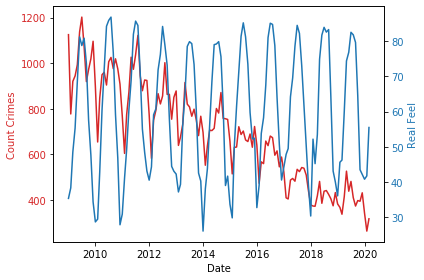

In [85]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Count Crimes', color=color)
ax1.plot(org_crime_temp_df.index, org_crime_temp_df.person_crime, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Real Feel', color=color)  # we already handled the x-label with ax1
ax2.plot(org_crime_temp_df.index, org_crime_temp_df.feels_like, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()